In [38]:
!pip install opencv-python

!pip install tensorflow==1.13.1
!pip install keras==2.2.4
!pip install h5py==2.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

Text(0.5, 1.0, 'Image plot')

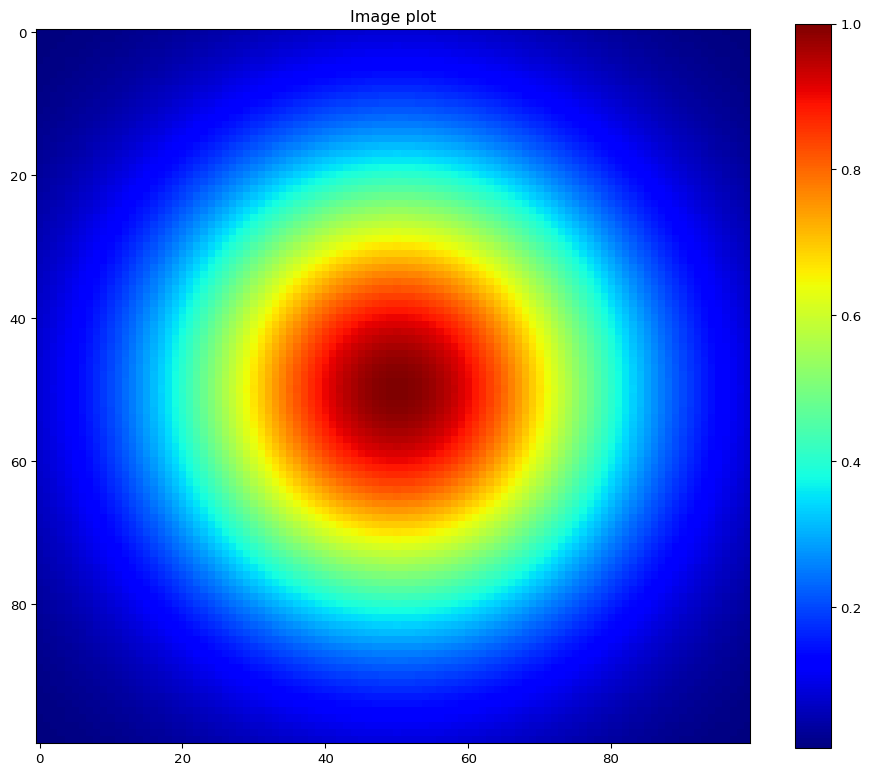

In [39]:
import numpy as np
import matplotlib.pyplot as plt

######## Creating a set of equally space points and plotting them as a figure using matplotlib #######

points = np.arange(-5, 5, 0.1)   # 100 equally spaced points
xs, ys = np.meshgrid(points, points)
print(points)

####################################################################
z = np.exp(-0.1*(xs**2+ys**2))
plt.figure(figsize=(12, 10), dpi=96, facecolor='white')
plt.imshow(z, cmap=plt.cm.jet)
plt.colorbar()
plt.title("Image plot")



Mounted at /content/gdrive


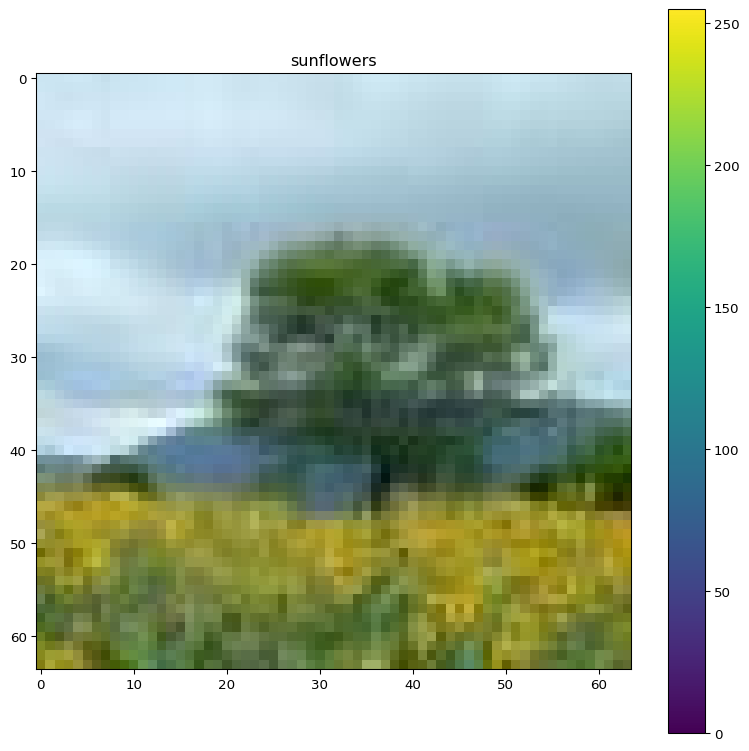

In [40]:
###### Reading images stored in a local directory on gdrive #########
import cv2
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

### Reading single image and visualizing them using matplotlib
img_dir = r'/content/gdrive/MyDrive/Colab Notebooks/flower_64/train/sunflowers/26254755_1bfc494ef1_n.jpg'

img_path = r'/content/gdrive/MyDrive/Colab Notebooks/flower_64/train/sunflowers'
img_name = '26254755_1bfc494ef1_n.jpg'

img_1 = cv2.imread(os.path.join(img_path, img_name))
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10), dpi=96, facecolor='white')
plt.imshow(img_1)
plt.title("sunflowers")
plt.colorbar()
plt.show()

In [41]:
! ls -l 

total 8
drwx------ 5 root root 4096 Oct  7 10:14 gdrive
drwxr-xr-x 1 root root 4096 Oct  5 13:35 sample_data


   f(x)  g(x)
1     2     4
2    10    -2
3    12     8
4     6    -4


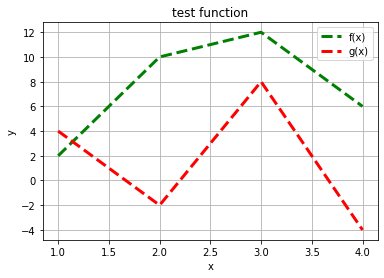

In [42]:
# Plotting graph using pandas library
import pandas as pd
import numpy as np

y = {'f(x)':[2,10, 12, 6], 'g(x)':[4, -2, 8, -4]}
x = [1, 2, 3, 4]

graph = pd.DataFrame(y, x)
print(graph)

graph.plot(kind="line", grid=True, color=['green','red'], linestyle='dashed', linewidth = 3,title="test function", xlabel="x", ylabel="y")

# # get current axes command
# ax = plt.gca()
  
# # get command over the individual
# # boundary line of the graph body
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

In [43]:
import numpy as np
# construct the AND dataset where X is the number of features, y is the target
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) 
y = np.array([[0], [0], [0], [1]])
print(X.shape)
print(y.shape)

(4, 2)
(4, 1)


In [44]:
######## PERCEPTRON ############################
import numpy as np

class Perceptron:
  def __init__(self, N, alpha=0.1):
    # initialize the weight matrix and store the learning rate
    self.W = np.random.randn(N + 1) / np.sqrt(N)
    self.alpha = alpha

  def step(self, x):
    # apply the step function
    return 1 if x > 0 else 0

  def fit(self, X, y, epochs=10):
   # insert a column of 1's as the last entry in the feature matrix 
   X = np.c_[X, np.ones((X.shape[0]))]

   # loop over the desired number of epochs
   for epoch in np.arange(0, epochs):
     # loop over each individual data point
     for (x, target) in zip(X, y):

       # take the dot product between the input features
       # and the weight matrix, then pass this value
       # through the step function to obtain the prediction
       p = self.step(np.dot(x, self.W))

       # only perform a weight update if our prediction
       # does not match the target
       if p != target:
         # determine the error
         error = p - target
         # update the weight matrix
         self.W += -self.alpha * error * x
         print(epoch, error)

  def predict(self, X, addBias=True):
    # ensure our input is a matrix
    X = np.atleast_2d(X)

    # check to see if the bias column should be added
    if addBias:
      # insert a column of 1's as the last entry in the feature matrix (bias)
      X = np.c_[X, np.ones((X.shape[0]))]
    
    # take the dot product between the input features and the
    # weight matrix, then pass the value through the step function
    return self.step(np.dot(X, self.W))

# construct the AND dataset
# X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# y = np.array([[0], [0], [0], [1]])

# construct the or dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

# construct the exor dataset
# X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# y = np.array([[0], [1], [1], [0]])


# define our perceptron and train it
print("............ training perceptron...........................")
p = Perceptron(X.shape[1], alpha=0.01)
p.fit(X, y, epochs=200)

# now that our perceptron is trained we can evaluate it
print(".............testing perceptron............................")

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
	# make a prediction on the data point and display the result
	# to our console
	pred = p.predict(x)
	print("data={}, ground-truth={}, pred={}".format(x, target[0], pred))


............ training perceptron...........................
0 [-1]
0 [-1]
0 [-1]
1 [-1]
1 [-1]
1 [-1]
2 [-1]
2 [-1]
2 [-1]
3 [-1]
3 [-1]
3 [-1]
4 [-1]
4 [-1]
4 [-1]
5 [-1]
5 [-1]
5 [-1]
6 [-1]
6 [-1]
6 [-1]
7 [-1]
7 [-1]
7 [-1]
8 [-1]
8 [-1]
8 [-1]
9 [-1]
9 [-1]
10 [-1]
10 [-1]
11 [-1]
11 [-1]
12 [-1]
12 [-1]
13 [-1]
13 [-1]
14 [-1]
14 [-1]
15 [-1]
15 [-1]
16 [-1]
16 [-1]
17 [-1]
18 [-1]
19 [-1]
20 [-1]
21 [-1]
22 [-1]
23 [-1]
24 [-1]
25 [-1]
26 [-1]
27 [-1]
28 [-1]
29 [-1]
30 [-1]
31 [-1]
32 [-1]
33 [-1]
34 [-1]
35 [-1]
36 [-1]
37 [-1]
38 [-1]
39 [-1]
40 [-1]
41 [-1]
42 [-1]
43 [-1]
44 [-1]
.............testing perceptron............................
data=[0 0], ground-truth=0, pred=0
data=[0 1], ground-truth=1, pred=1
data=[1 0], ground-truth=1, pred=1
data=[1 1], ground-truth=1, pred=1


# Download dataset from keras package and preparation of data as npy files

# Designed to understand and get hands on about data preparation stages while reading a single image or a batch of images.

# CIFAR-10

Each image in CIFAR dataset is a 32x32 (image rows, image columns) dimensions and a RGB image constituting of 10 different categories of the image.

In [49]:
from tensorflow.python.keras.datasets import cifar10

import numpy as np
from tensorflow.python.keras.utils import np_utils

from tensorflow.python.keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.optimizers import SGD, RMSprop, adam
import os

#################################################################################
##### Mount Google drive ########################################################
#################################################################################

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#################################################################################
##### Mount Google drive ########################################################
#################################################################################


def save_npy_files(trainX, Y_train, testX, Y_test, npy_save_dir):
    np.savez(os.path.join(npy_save_dir, 'ret_cifar_train'), trainX, Y_train)
    np.savez(os.path.join(npy_save_dir, 'ret_cifar_test'), testX, Y_test)

##################################################################################
##### create save dir on the mounted google drive ################################
##################################################################################

npy_save_dir = '/content/gdrive/MyDrive/Colab Notebooks/CIFAR_npy_data'

if not os.path.exists(npy_save_dir):
  os.mkdir(npy_save_dir)

##################################################################################
############ LOAD CIFAR10 ########################################################
##################################################################################

print("[INFO] loading CIFAR10 data")

((trainX, trainY), (testX, testY)) = cifar10.load_data()

############################  Sanity check ###############################################   
print(trainX.shape)
print(testX.shape)
############################  Sanity check ###############################################   

np.random.seed(123)

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(trainY, 10)
Y_test = np_utils.to_categorical(testY, 10)
print(Y_train.shape, Y_test.shape)

########## Visualise images and class labels ###############################################

labelNames=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(labelNames[int(trainY[4])])
import matplotlib.pyplot as plt
%matplotlib inline


# Visualise a single image
plt.imshow(trainX[4])
plt.show()


def plot_images(images,class_label):
    fig,axes=plt.subplots(10, 10, figsize=(20, 15))
    fig.subplots_adjust(hspace=0.8, wspace=0.4)
    
    for i,ax in enumerate(axes.flat):
        ax.imshow(trainX[i])
        xlab=labelNames[int(trainY[i])]
        ax.set_xlabel(xlab,fontsize=16)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.xaxis.label.set_color('red')
    plt.show()


# Visualize the batch of training images to explore the image pixels and data      
images=trainX[0:100]
cls=trainY[0:100]
plot_images(images,cls)

trainX=trainX.astype("float")/255.0
testX=testX.astype("float")/255.0

print(trainX.dtype)
print(testX.dtype)

############ save the loaded data ###############################################
#save_npy_files(trainX,Y_train, testX, Y_test, npy_save_dir)

AttributeError: ignored